In [1]:
%matplotlib inline
import math
import copy
import numpy as np
import pandas as pd
from matplotlib import pylab as plt

## シグモイド関数

$$
\varsigma (x) = \frac{1}{1+exp(-x)}
$$

Text(2, 0.5, '0.5')

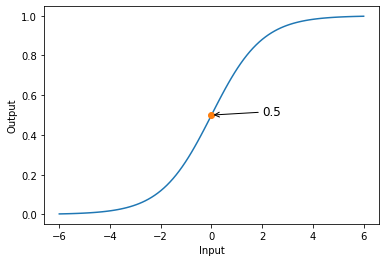

In [2]:
def std_sigmoid(x):
  """
  :param: x: x
  """
  return 1 / (1 + np.exp(-x))

t = np.linspace(-6, 6, 100)
plt.plot(t, std_sigmoid(t))
plt.xlabel('Input')
plt.ylabel('Output')
plt.plot(0, 0.5, 'o')
plt.annotate('0.5', xy=(0, 0.5), xytext=(2, 0.5), arrowprops=dict(arrowstyle='->'), fontsize=12)

Text(0, 0.5, 'Output: Probability of label A')

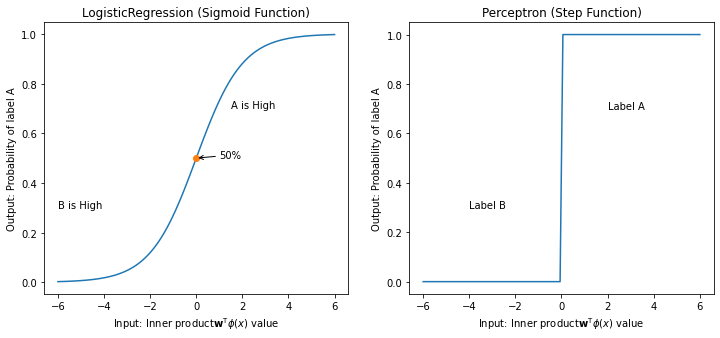

In [3]:
def step(x):
  """
  :param:: x: x
  """
  return np.array(x >= 0)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

t = np.linspace(-6, 6, 100)
plt.plot(t, std_sigmoid(t))
plt.plot(0, 0.5, 'o')

plt.text(-6, 0.3, 'B is High')
plt.text(1.5, 0.7, 'A is High')
plt.annotate('50%', xy=(0, 0.5), xytext=(1, 0.5), arrowprops=dict(arrowstyle='->'))

plt.title('LogisticRegression (Sigmoid Function)')
plt.xlabel('Input: Inner product'r'$\mathbf{w}^{\mathrm{T}}\phi(x)$'' value')
plt.ylabel('Output: Probability of label A')

plt.subplot(1, 2, 2)

t = np.linspace(-6, 6, 100)
plt.plot(t, step(t))

plt.text(-4, 0.3, 'Label B')
plt.text(2, 0.7, 'Label A')

plt.title('Perceptron (Step Function)')
plt.xlabel('Input: Inner product'r'$\mathbf{w}^{\mathrm{T}}\phi(x)$'' value')
plt.ylabel('Output: Probability of label A')

## 識別関数

$$
y(x) = ς ( w^T \phi (x)) 
$$

In [4]:
def discriminant(p, w):
  """
  :param p: feature vector
  :param w: coeficient vector
  """
  return np.dot(p, w)

df = pd.DataFrame(
    {
        'x0': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        'x1': [1.5, 2, 3, 1.5, 0.5, -1, -2, -3, -1.5, 0],
        'x2': [1, 2.5, 3, -2, 2, -3, -1.2, -0.5, 2, -1.5],
        'label': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'],
        'label_index': [1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0]
     }
)

x = np.array(df.loc[:, ['x0', 'x1', 'x2']])
w = [0, 1, 1]
N = len(df.index)
output_label = np.zeros(N)
y = np.zeros(N)

for i in range(N):
  output_label[i] = discriminant(x[i], w)
  y[i] = std_sigmoid(output_label[i])

df_ = copy.deepcopy(df)
df_['discriminant value'] = output_label
df_['prediction value Y'] = y
df_

,x0,x1,x2,label,label_index,discriminant value,prediction value Y
0,1,1.5,1.0,A,1.0,2.5,0.924142
1,1,2.0,2.5,A,1.0,4.5,0.989013
2,1,3.0,3.0,A,1.0,6.0,0.997527
3,1,1.5,-2.0,A,1.0,-0.5,0.377541
4,1,0.5,2.0,A,1.0,2.5,0.924142
5,1,-1.0,-3.0,B,0.0,-4.0,0.017986
6,1,-2.0,-1.2,B,0.0,-3.2,0.039166
7,1,-3.0,-0.5,B,0.0,-3.5,0.029312
8,1,-1.5,2.0,B,0.0,0.5,0.622459
9,1,0.0,-1.5,B,0.0,-1.5,0.182426


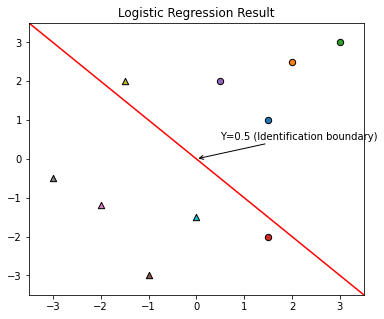

In [5]:
plt.figure(figsize=(6, 5))
plt.xlim([-3.5, 3.5])
plt.ylim([-3.5, 3.5])
plt.title('Logistic Regression Result')

for i in range(N):
  if df.loc[i, 'label_index'] == 1.0:
    m = 'o'
  else:
    m = '^'
  
  plt.scatter(
      df.loc[i, 'x1'],
      df.loc[i, 'x2'],
      s=40,
      label='Label A',
      marker=m,
      edgecolor='k',
      cmap='bwr',
      vmin=0,
      vmax=1
  )

plt.annotate('Y=0.5 (Identification boundary)', xy=(0, 0), xytext=(0.5, 0.5), arrowprops=dict(arrowstyle='->'))

line_x1 = np.linspace(-5, 5, 100)
plt.plot(line_x1, -1 * (line_x1 * w[1] + w[0]) / w[2], 'r-')

In [6]:
label_answer = np.array(df['label_index'])
label_test = np.zeros(N)
result = np.zeros(N)
threshold = 0.5

for i in range(N):
  label_test[i] = y[i] >= threshold

  result[i] = label_answer[i] == label_test[i]

df_ = copy.deepcopy(df_)
df_['discriminant value'] = output_label
df_['prediction value Y'] = y
df_['prediction label'] = label_test
df_['predictions correct or incorrect'] = result
df_

,x0,x1,x2,label,label_index,discriminant value,prediction value Y,prediction label,predictions correct or incorrect
0,1,1.5,1.0,A,1.0,2.5,0.924142,1.0,1.0
1,1,2.0,2.5,A,1.0,4.5,0.989013,1.0,1.0
2,1,3.0,3.0,A,1.0,6.0,0.997527,1.0,1.0
3,1,1.5,-2.0,A,1.0,-0.5,0.377541,0.0,0.0
4,1,0.5,2.0,A,1.0,2.5,0.924142,1.0,1.0
5,1,-1.0,-3.0,B,0.0,-4.0,0.017986,0.0,1.0
6,1,-2.0,-1.2,B,0.0,-3.2,0.039166,0.0,1.0
7,1,-3.0,-0.5,B,0.0,-3.5,0.029312,0.0,1.0
8,1,-1.5,2.0,B,0.0,0.5,0.622459,1.0,0.0
9,1,0.0,-1.5,B,0.0,-1.5,0.182426,0.0,1.0


In [7]:
def log(x):
  """
  :param: x: x
  """
  return math.log(max(x, 1.0E-20))

error = 0

for i in range(N):
  error -= label_answer[i] * log(y[i]) + (1 - label_answer[i]) * log(1 - y[i])

error / N

0.24087238242672498

In [8]:
eta = 0.05

error = 0

for i in range(N):
  w -= eta * (y[i] - label_answer[i]) * x[i]

Text(0, 0.5, 'Mean error')

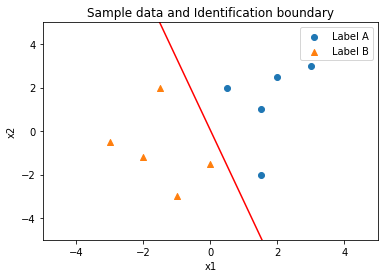

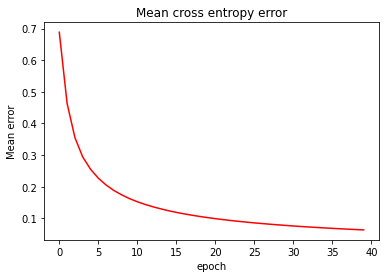

In [10]:
def discriminant(p, w):
  """
  :param p: feature vector
  :param w: coeficient vector
  """
  return np.dot(p, w)

def std_sigmoid(x):
  """
  :param: x: x
  """
  return 1 / (1 + np.exp(-x))

def predict(p, w):
  """
  :param p: feature vector
  :param w: coeficient vector
  """
  return std_sigmoid(discriminant(p, w))

def log(x):
  """
  :param: x: x
  """
  return math.log(max(x, 1.0E-20))

df = pd.DataFrame(
    {
        'x0': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        'x1': [1.5, 2, 3, 1.5, 0.5, -1, -2, -3, -1.5, 0],
        'x2': [1, 2.5, 3, -2, 2, -3, -1.2, -0.5, 2, -1.5],
        'label': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'],
        'label_index': [1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0]
     }
)

label_answer = np.array(df['label_index'])
w = [1, 0, 0]
x = np.array(df.loc[:, ['x0', 'x1', 'x2']])
max_iter = 40
N = len(df.index)
output_label = np.zeros(N)
y = np.zeros(N)
cost_sum = np.zeros(max_iter)

for iter_  in range(max_iter):
  for i in np.random.permutation(np.arange(N)):
    y[i] = predict(x[i], w)
    w -= eta * (y[i] - label_answer[i]) * x[i]
  
  error = 0

  for i in range(N):
    error -= label_answer[i] * log(y[i]) + (1 - label_answer[i]) * log(1 - y[i])
  
  cost_sum[iter_] = error / N

plt.title('Sample data and Identification boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([-5, 5])
plt.ylim([-5, 5])

label_a = df[df['label_index'] == 1]
plt.scatter(label_a['x1'], label_a['x2'], label='Label A', marker='o')
label_b = df[df['label_index'] == 0]
plt.scatter(label_b['x1'], label_b['x2'], label='Label B', marker='^')
plt.legend()

line_x1 = np.linspace(-5, 5, 10)
plt.plot(line_x1, -1 * (line_x1 * w[1] + w[0]) / w[2], 'r-')

plt.figure()
plt.title('Mean cross entropy error')
x_num = np.arange(max_iter)
plt.plot(x_num, cost_sum[x_num], 'r-')
plt.xlabel('epoch')
plt.ylabel('Mean error')